In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


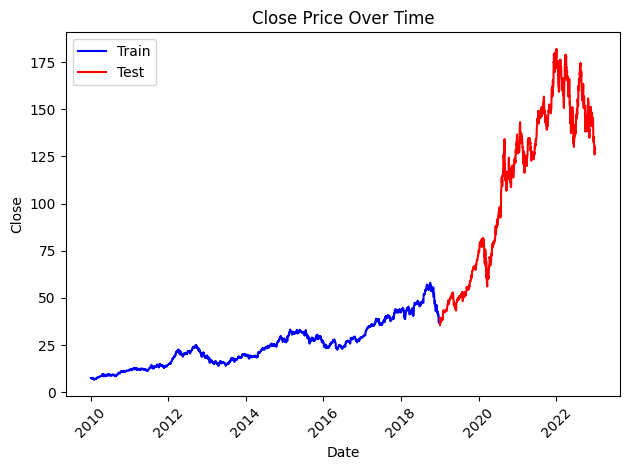

In [2]:
#data preprocessing
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('AAPL',start_date,end_date,2019)
data.data_preprocess()

In [3]:
ga = IslandGGA(data=data.train_data,num_islands=3,m_iter= 10,num_iter=10,n_migrants_rate=0.8,pSize=20,r_cross=0.3,r_mut=0.1,strategies=data.strategies,evolve_strategy="master_slave")
ga.evolve()

Running master_slave
Generation 0: Best fitness = 305.67333957722246 Average fitness = 183.36337917084185
Generation 1: Best fitness = 397.62813571309397 Average fitness = 232.39271995034468
Generation 2: Best fitness = 397.62813571309397 Average fitness = 264.68906062038633
Generation 3: Best fitness = 397.62813571309397 Average fitness = 294.6885380016951
Generation 4: Best fitness = 549.9197511645469 Average fitness = 346.16789695324553
Generation 5: Best fitness = 549.9197511645469 Average fitness = 376.67401053437425
Generation 6: Best fitness = 647.8339798133495 Average fitness = 436.961999123674
Generation 7: Best fitness = 647.8339798133495 Average fitness = 435.47787193507764
Generation 8: Best fitness = 647.8339798133495 Average fitness = 484.54327842968405
Generation 9: Best fitness = 647.8339798133495 Average fitness = 531.0847913213984


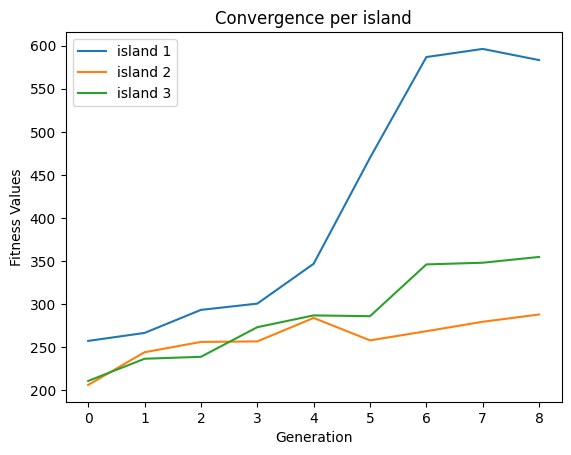

In [5]:
#plot
x = range(len(ga.island_convergence[:-1]))
y = [[island[i] for island in ga.island_convergence[:-1]] for i in range(len(ga.island_convergence[0][:-1]))]
# Define the labels for each data column
labels = [f'island {i+1}' for i in range(len(y))]

# Plot the data dynamically using a loop
for i, column in enumerate(y):
    plt.plot(x, column, label=labels[i])
plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Convergence per island')
plt.legend()
plt.show()